In [1]:
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# loading databases:
datasets = '../Datasets/Looping/*'
datasets = glob(datasets)
print(datasets)

In [2]:
real_chain = '../Datasets/Looping/Looping-SimpleModel-minDMonLargeRealSmallEnds.csv'
real_chain = pd.read_csv(real_chain, header=0)
real_chain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   dCrowd     120000 non-null  float64
 1   nMon       120000 non-null  int64  
 2   phiCrowd   120000 non-null  float64
 3   dMonLarge  120000 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 3.7 MB


In [4]:
nmon_cond = (real_chain['nMon'].isin([100, 200, 400, 800]))
phi_crd_cond = (real_chain['phiCrowd'].isin(np.arange(0.050,0.450, 0.05)))
dcrowd_cond = (real_chain['dCrowd'].isin([0.5, 1, 2]))
real_chain_nMon_filtered = real_chain.loc[nmon_cond & dcrowd_cond, :]
real_chain_phiC_filtered = real_chain.loc[phi_crd_cond & dcrowd_cond, :]

In [9]:
attr_labels = {
    'phiCrowd': '$\phi_c$',
    'dCrowd': '${{a_c}}/{{a_s}}$',
    'nMon': '$N$',
    'dMonLarge': '${{a_l}}/{{a_s}}$'
}

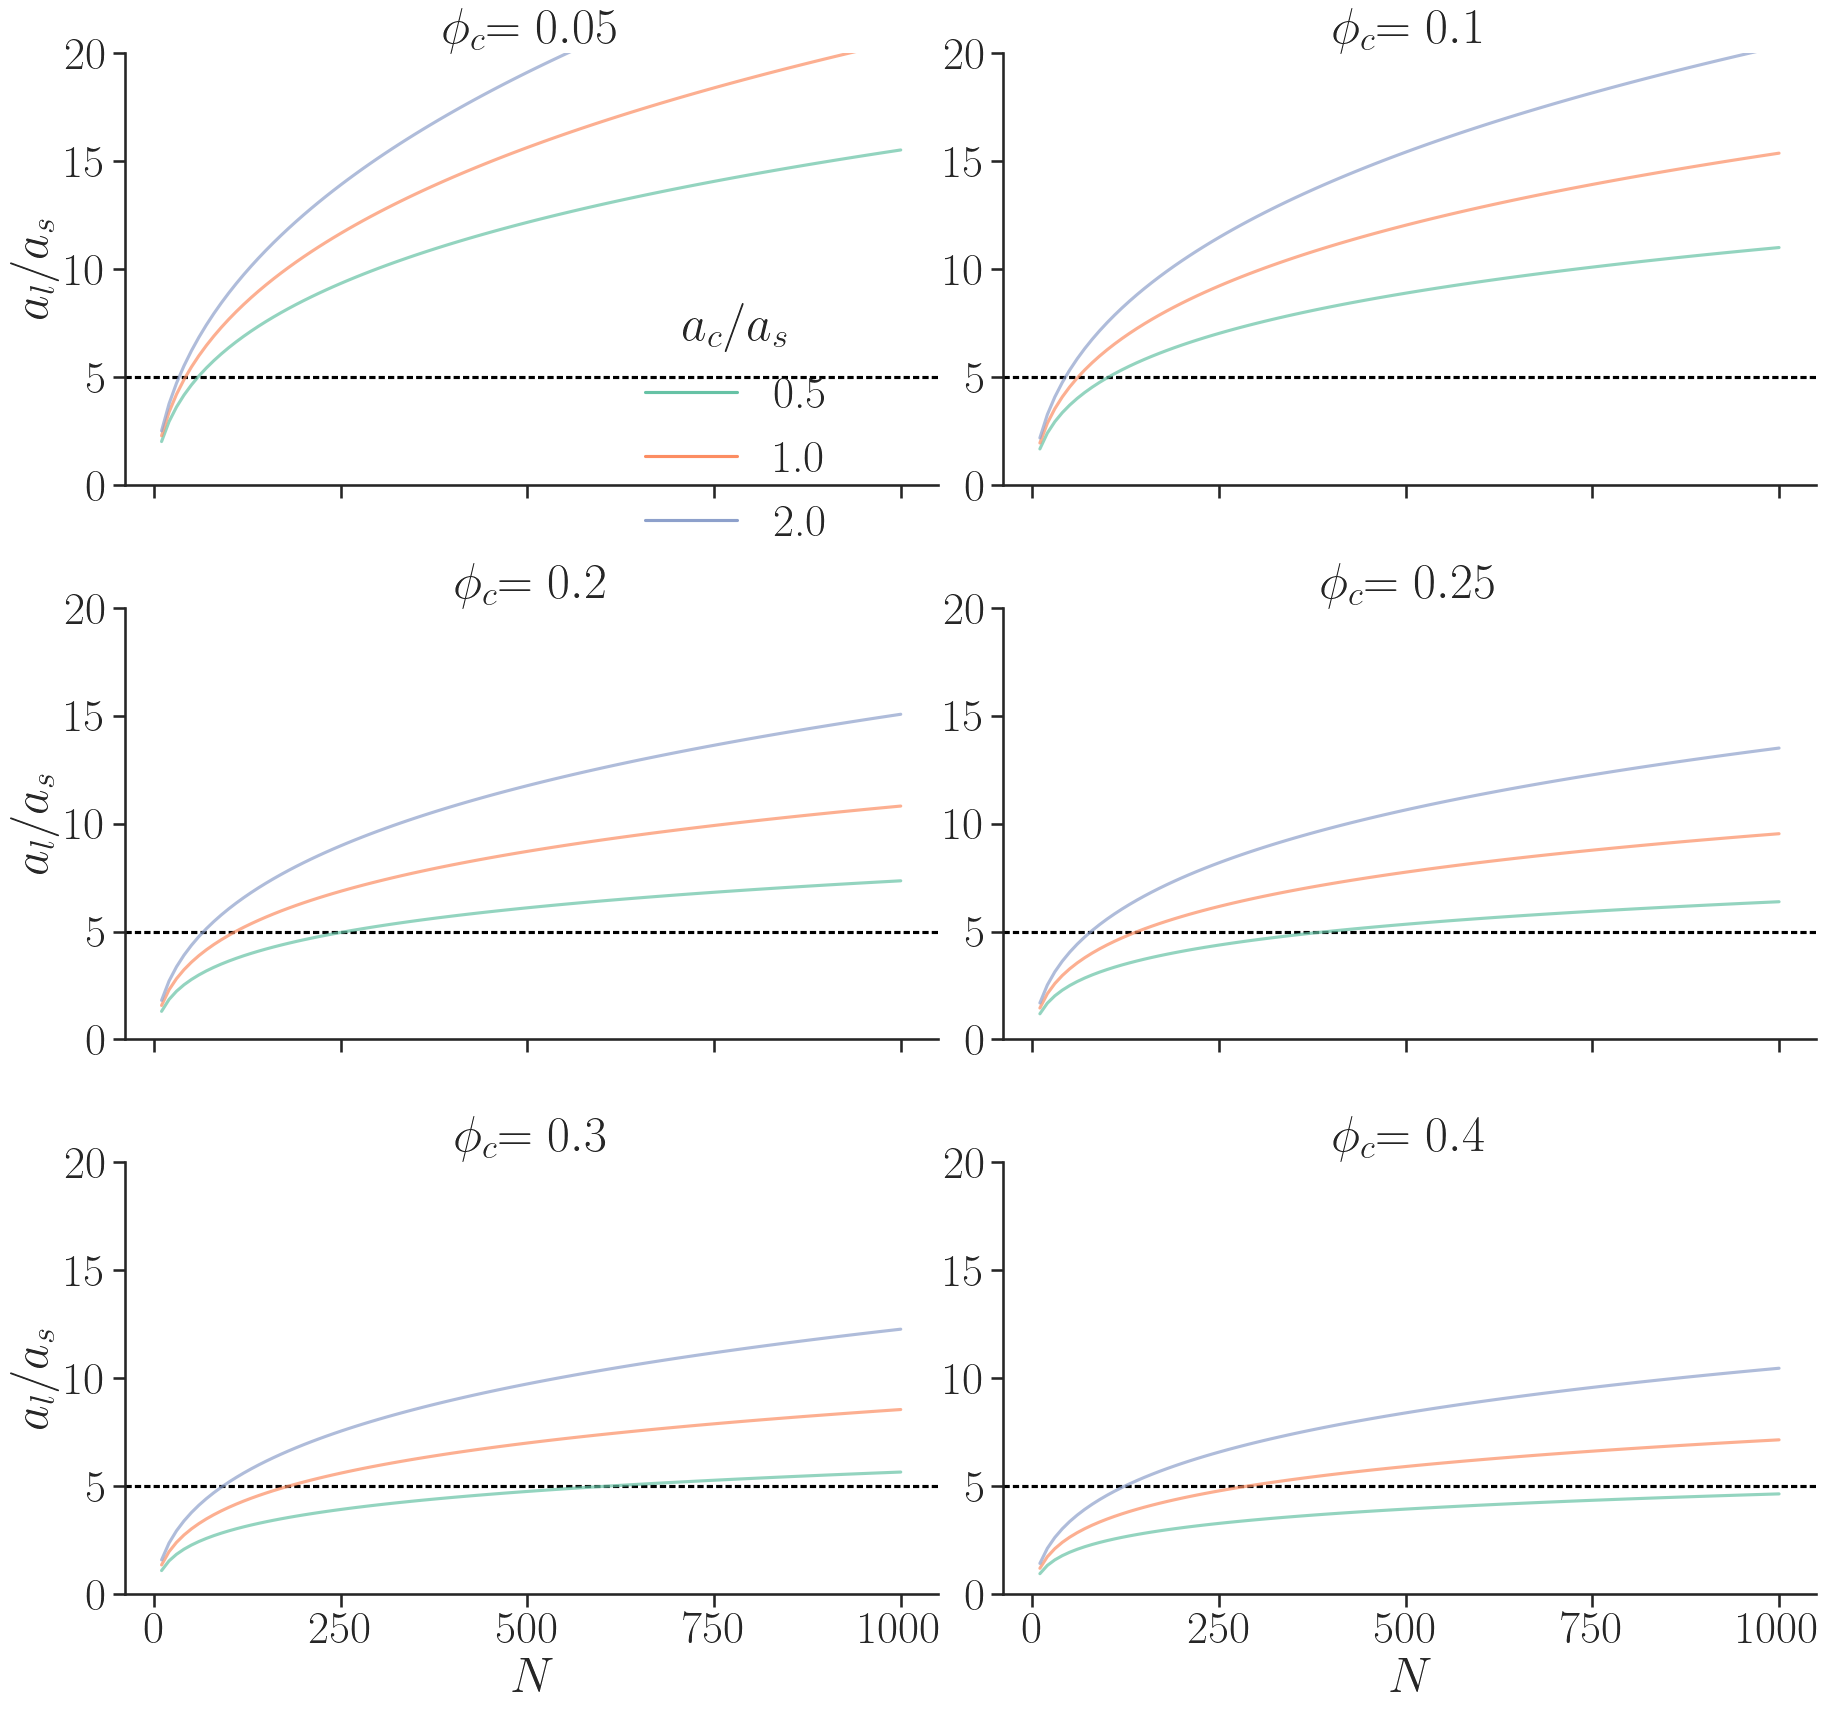

In [20]:
col_attr= 'phiCrowd'
y_attr= 'dMonLarge'
x_attr= 'nMon'
hue_attr= 'dCrowd'
dmon_large_sel = 5.0
color_palette = 'Set2'
alpha = 0.7
height = 6
aspect = 1.618
plot_context = 'talk'
rc_params = {
        'mathtext.default': 'regular',
        'text.usetex': True
    }
save_to = './'
font_scale = 2
facet_kws = {'sharey': False, 'sharex': True, 'legend_out': True}
loc = 'lower left'
move_legend_kws = {
    'bbox_to_anchor': (0.3, 0.65)
}
ext = 'pdf'
col_wrap=2
save_to = './'
axes_style = 'ticks'
font_family = 'Times New Roman'
fig_title_kw = {'x': 0.5, 'y': 1.0}

sns.set_theme(
        context=plot_context,
        style=axes_style,
        palette=color_palette,
        font=font_family,
        font_scale=font_scale,
        rc=rc_params
)

loop_grid = sns.relplot(
    data=real_chain_phiC_filtered,
    x=x_attr,
    y=y_attr,
    col=col_attr,
    hue=hue_attr,
    col_wrap=col_wrap,
    kind='line',
    height=height,
    aspect=aspect,
    palette=color_palette,
    facet_kws=facet_kws,
    alpha=alpha,
    ci=None
)

#for idx, new_label in enumerate(legend_labels[1:]):
#        loop_grid._legend.texts[idx].set_text(new_label)
loop_grid.map(plt.axhline, y=dmon_large_sel, color='black', dashes=(2, 1), zorder=0)
loop_grid.set_ylabels(attr_labels[y_attr])
loop_grid.set_xlabels(attr_labels[x_attr])
loop_grid.set_titles(attr_labels[col_attr] + r"$={col_name}$")
loop_grid.legend.set_title(attr_labels[hue_attr])
loop_grid.set()
loop_grid.set(ylim=[0,20])
#xticks=np.arange(0,0.5,0.1))
sns.move_legend(loop_grid, loc=loc, **move_legend_kws)
loop_grid.tight_layout(w_pad=0)
output = "-".join(["looping", hue_attr, col_attr])
loop_grid.savefig(save_to + output + "." + ext, bbox_inches='tight')